In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import read_table

In [33]:
df = read_table("PlayerBatting", random_subset = 1)

In [34]:
df.info()

df = df.drop(columns=["playerID", "yearID", "stint", "teamID", "lgID", "G", "debut", "years_of_experience"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13755 entries, 0 to 13754
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           13755 non-null  int64  
 1   playerID             13755 non-null  object 
 2   yearID               13755 non-null  int64  
 3   stint                13755 non-null  int64  
 4   teamID               13755 non-null  object 
 5   lgID                 13755 non-null  object 
 6   G                    13755 non-null  int64  
 7   AB                   13755 non-null  float64
 8   R                    13755 non-null  float64
 9   H                    13755 non-null  float64
 10  2B                   13755 non-null  float64
 11  3B                   13755 non-null  float64
 12  HR                   13755 non-null  float64
 13  RBI                  13755 non-null  float64
 14  SB                   13755 non-null  float64
 15  CS                   13755 non-null 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [36]:
predicted_data = "IBB"
X = df.drop(columns=[predicted_data])  # Features
y = df[predicted_data]  

mse on 1 nearest-neighboors: 11.299975769323964%
mse on 2 nearest-neighboors: 10.044584443905984%
mse on 3 nearest-neighboors: 9.497482701989608%
mse on 4 nearest-neighboors: 9.506693724254907%
mse on 5 nearest-neighboors: 9.598992003876909%
mse on 6 nearest-neighboors: 9.81822954527098%
mse on 7 nearest-neighboors: 9.840923139306607%
mse on 8 nearest-neighboors: 10.005811576205476%
mse on 9 nearest-neighboors: 10.01945035254138%
mse on 10 nearest-neighboors: 10.152246183668526%
mse on 11 nearest-neighboors: 10.358581964767396%
mse on 12 nearest-neighboors: 10.31040169076273%
mse on 13 nearest-neighboors: 10.419108970655074%
mse on 14 nearest-neighboors: 10.48612052041558%


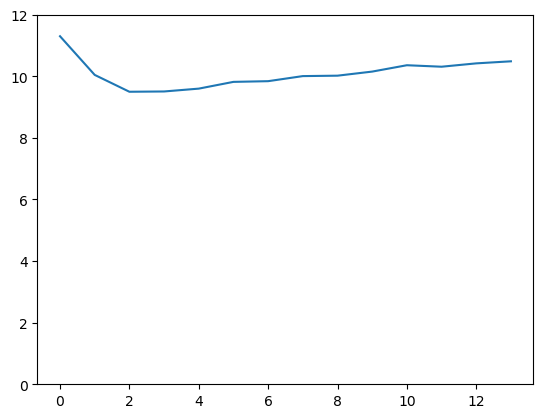

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
data = []
for i in range(1,15):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'mse on {i} nearest-neighboors: {mse}%')
    data.append(mse)

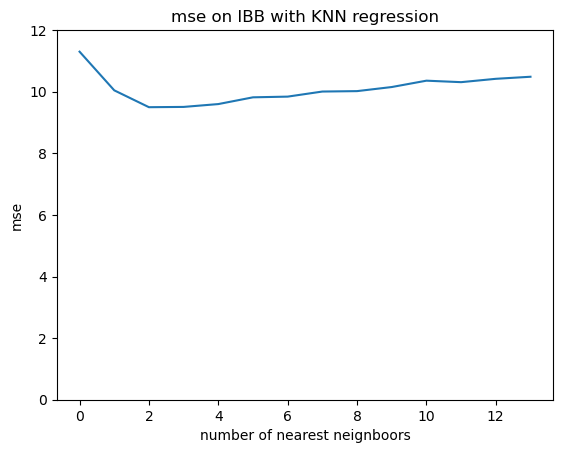

In [44]:
    
plt.plot(data)
plt.xlabel("number of nearest neignboors")
plt.ylabel("mse")
plt.title(f"mse on {predicted_data} with KNN regression")
plt.ylim(0,12)
plt.show()